In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy.ma as ma

In [11]:
a=pd.read_csv(".\weatherAUS.csv")


In [12]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
a

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [13]:
def Wind_set(a,h):
    a.loc[a[h]=='N',h]=0
    a.loc[a[h]=='NNE',h]=22.5
    a.loc[a[h]=='NE',h]=45
    a.loc[a[h]=='ENE',h]=67.5
    a.loc[a[h]=='E',h]=90
    a.loc[a[h]=='ESE',h]=112.5
    a.loc[a[h]=='SE',h]=135
    a.loc[a[h]=='SSE',h]=157.5
    a.loc[a[h]=='S',h]=180
    a.loc[a[h]=='SSW',h]=202.5
    a.loc[a[h]=='SW',h]=225
    a.loc[a[h]=='WSW',h]=247.5
    a.loc[a[h]=='W',h]=270
    a.loc[a[h]=='WNW',h]=292.5
    a.loc[a[h]=='NW',h]=315
    a.loc[a[h]=='NNW',h]=337.5

def Rain_set(a,h):
    a.loc[a[h]=='No',h]=0
    a.loc[a[h]=='Yes',h]=1  
def Date_set(a):
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='01','Date']=1
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='02','Date']=2
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='03','Date']=3
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='04','Date']=4
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='05','Date']=5
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='06','Date']=6
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='07','Date']=7
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='08','Date']=8
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='09','Date']=9
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='10','Date']=10
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='11','Date']=11
    a.loc[a['Date'].str.split(pat='-',expand=True)[1]=='12','Date']=12
def Location_set(a,h):
    for i in h:
        a.loc[a['Location']==i,'Location']=h[i]

In [14]:
b=a.copy()
b.dropna(subset=['RainTomorrow'], inplace=True)
b.dropna(subset=['RainToday'], inplace=True)

Wind_set(b,'WindGustDir')
Wind_set(b,'WindDir9am')
Wind_set(b,'WindDir3pm')
Rain_set(b,'RainToday')
Rain_set(b,'RainTomorrow')
Date_set(b)
g=b.Location.unique()
towns={animal: it for it, animal in enumerate(g)}
Location_set(b,towns)
b=b.where(pd.notna(b), b.mean(), axis="columns")



In [15]:
b

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,0,13.4,22.9,0.6,5.472516,7.63054,270,44.0,270,292.5,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
1,12,0,7.4,25.1,0.0,5.472516,7.63054,292.5,44.0,337.5,247.5,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
2,12,0,12.9,25.7,0.0,5.472516,7.63054,247.5,46.0,270,247.5,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
3,12,0,9.2,28.0,0.0,5.472516,7.63054,45,24.0,135,90,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
4,12,0,17.5,32.3,1.0,5.472516,7.63054,270,41.0,67.5,315,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,6,48,3.5,21.8,0.0,5.472516,7.63054,90,31.0,112.5,90,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0,0
145455,6,48,2.8,23.4,0.0,5.472516,7.63054,90,31.0,135,67.5,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0,0
145456,6,48,3.6,25.3,0.0,5.472516,7.63054,337.5,22.0,135,0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0,0
145457,6,48,5.4,26.9,0.0,5.472516,7.63054,0,37.0,135,292.5,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0,0


In [16]:
c=b.reset_index( drop=True)

In [17]:
c

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,0,13.4,22.9,0.6,5.472516,7.63054,270,44.0,270,292.5,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
1,12,0,7.4,25.1,0.0,5.472516,7.63054,292.5,44.0,337.5,247.5,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
2,12,0,12.9,25.7,0.0,5.472516,7.63054,247.5,46.0,270,247.5,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
3,12,0,9.2,28.0,0.0,5.472516,7.63054,45,24.0,135,90,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
4,12,0,17.5,32.3,1.0,5.472516,7.63054,270,41.0,67.5,315,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,6,48,3.5,21.8,0.0,5.472516,7.63054,90,31.0,112.5,90,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0,0
140783,6,48,2.8,23.4,0.0,5.472516,7.63054,90,31.0,135,67.5,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0,0
140784,6,48,3.6,25.3,0.0,5.472516,7.63054,337.5,22.0,135,0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0,0
140785,6,48,5.4,26.9,0.0,5.472516,7.63054,0,37.0,135,292.5,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0,0


In [18]:
y=c.pop('RainTomorrow')


In [19]:
y

0         0
1         0
2         0
3         0
4         0
         ..
140782    0
140783    0
140784    0
140785    0
140786    0
Name: RainTomorrow, Length: 140787, dtype: object

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(c, y, test_size=0.25, shuffle=False)

In [21]:
y_train=y_train.astype("int")
y_test=y_test.astype("int")

In [22]:
X_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,12,0,13.4,22.9,0.6,5.472516,7.63054,270,44.00000,270,292.5,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0
1,12,0,7.4,25.1,0.0,5.472516,7.63054,292.5,44.00000,337.5,247.5,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0
2,12,0,12.9,25.7,0.0,5.472516,7.63054,247.5,46.00000,270,247.5,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0
3,12,0,9.2,28.0,0.0,5.472516,7.63054,45,24.00000,135,90,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0
4,12,0,17.5,32.3,1.0,5.472516,7.63054,270,41.00000,67.5,315,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105585,12,36,15.3,19.2,0.0,5.400000,6.90000,169.97,39.97052,180,135,11.0,9.0,80.0,62.0,1018.9,1016.8,8.000000,2.00000,16.9,18.8,0
105586,12,36,14.3,20.1,0.0,6.400000,8.10000,169.97,39.97052,202.5,202.5,13.0,22.0,69.0,72.0,1017.2,1014.9,7.000000,6.00000,17.8,19.0,0
105587,12,36,15.2,17.7,0.2,4.000000,1.10000,169.97,39.97052,157.5,135,17.0,19.0,62.0,62.0,1015.9,1015.0,7.000000,6.00000,17.4,17.4,0
105588,12,36,14.2,18.3,0.0,6.200000,9.40000,169.97,39.97052,157.5,157.5,13.0,19.0,64.0,64.0,1017.5,1015.9,7.000000,6.00000,16.0,17.6,0


### Наивный Байес

In [23]:
from sklearn.naive_bayes import  BernoulliNB

classifier = BernoulliNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

prediction

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
print (np.mean(prediction == y_test))

0.7818279967042646


In [25]:
from sklearn.naive_bayes import  MultinomialNB

classifier = MultinomialNB()
classifier.fit(abs(X_train), y_train)
prediction = classifier.predict(X_test)
print (np.mean(prediction == y_test))

0.8247862033696054


In [26]:
from sklearn.naive_bayes import  GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)


In [27]:
print (np.mean(prediction == y_test))

0.8356678125976645


In [28]:
from sklearn import metrics
metrics.recall_score(y_test, prediction)

0.5656861440170371

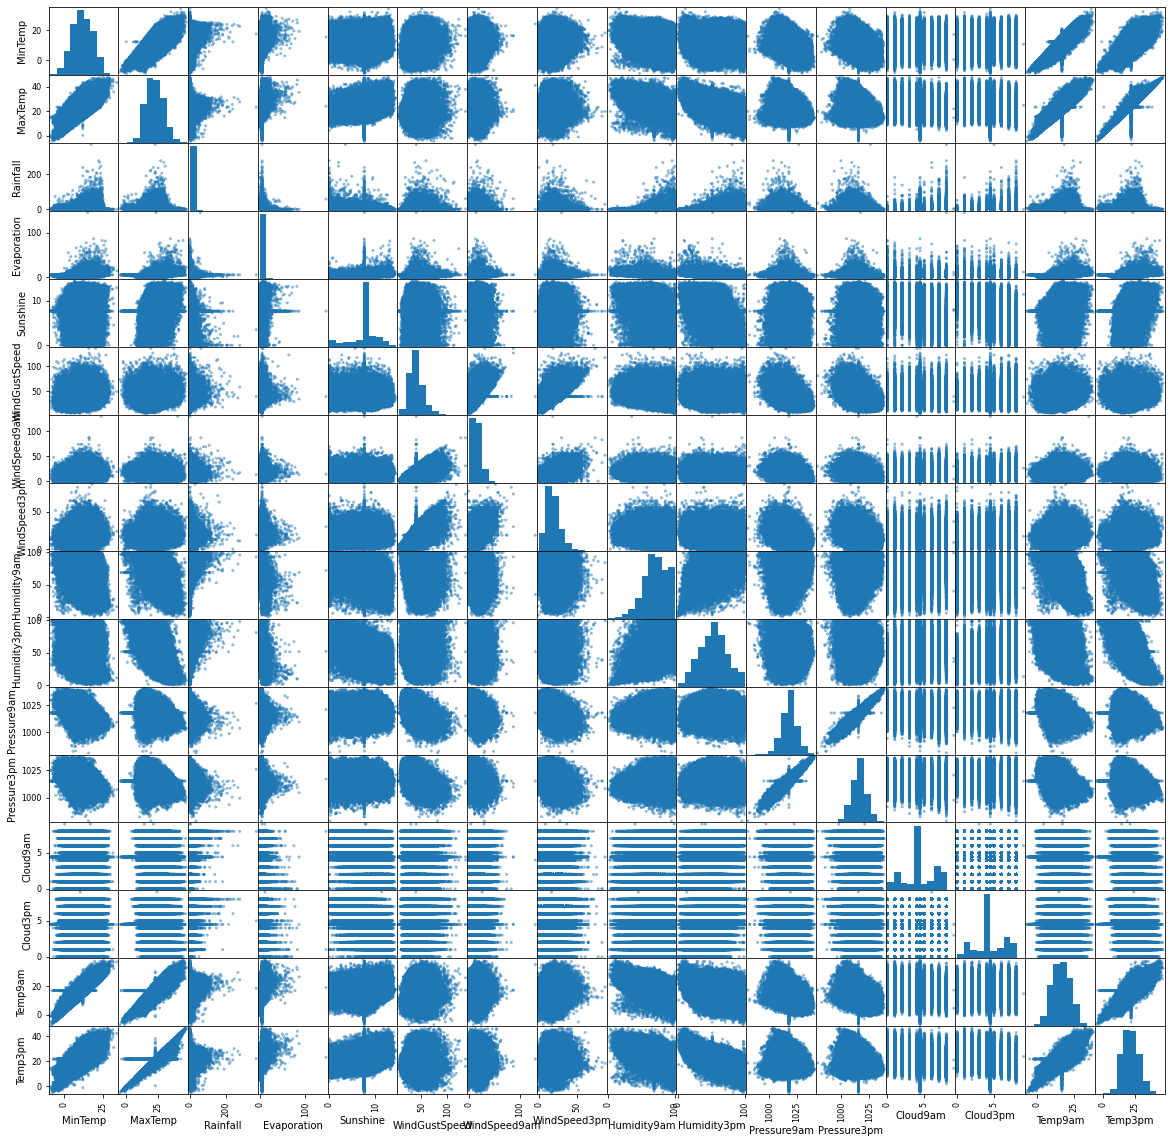

In [29]:
pd.plotting.scatter_matrix(X_train, figsize=(20,20));


## Ближайшие соседи

In [31]:
%%time
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

Wall time: 31.2 s


In [32]:
print (np.mean(prediction == y_test))

0.7890161093274995


In [34]:
%%time
neigh = KNeighborsClassifier(n_neighbors=23)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

print (np.mean(prediction == y_test))

0.8379123220729039
Wall time: 41.6 s


In [35]:
%%time

n_nb = range(18, 25)
res = []

for i in n_nb: 
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    prediction = neigh.predict(X_test)

    res.append((np.mean(prediction == y_test)))

Wall time: 4min 40s


In [36]:
res

[0.8343608830298037,
 0.8372872688013183,
 0.8344461175668381,
 0.8373440918260079,
 0.8349859363013893,
 0.8379123220729039,
 0.8340199448816661]

### Логистическая регрессия с помощью sklearn

In [38]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [39]:
print (np.mean(prediction == y_test))
metrics.recall_score(y_test, prediction)

0.8500724493564793


0.43045387994143486

In [40]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, prediction))

[[26686   998]
 [ 4279  3234]]


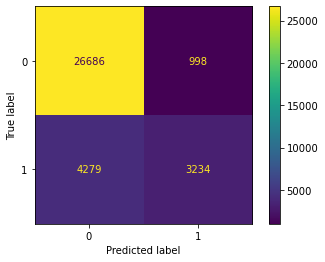

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     27684
           1       0.76      0.43      0.55      7513

    accuracy                           0.85     35197
   macro avg       0.81      0.70      0.73     35197
weighted avg       0.84      0.85      0.83     35197



In [43]:
pd.DataFrame(data = [X_train.columns, classifier.coef_[0]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
1,0.0123902,-0.000601842,0.0111278,-0.00675138,0.00993769,0.00689096,-0.112017,0.000613102,0.058875,-0.000641164,0.00136508,-0.0107072,-0.023659,0.00175907,0.0584028,0.173375,-0.181525,0.00426345,0.149052,0.00702034,0.0309007,0.604324


### Логистическая регрессия с помощью StatsModels

In [44]:
import statsmodels.api as sm

In [45]:
h=pd.DataFrame({'ones':np.ones(len(X_test))})
h

,ones
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
35192,1.0
35193,1.0
35194,1.0
35195,1.0


In [46]:
h1=pd.DataFrame({'ones1':np.ones(len(X_train))})
h1

,ones1
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
105585,1.0
105586,1.0
105587,1.0
105588,1.0


In [47]:
X_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,12,0,13.4,22.9,0.6,5.472516,7.63054,270,44.00000,270,292.5,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0
1,12,0,7.4,25.1,0.0,5.472516,7.63054,292.5,44.00000,337.5,247.5,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0
2,12,0,12.9,25.7,0.0,5.472516,7.63054,247.5,46.00000,270,247.5,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0
3,12,0,9.2,28.0,0.0,5.472516,7.63054,45,24.00000,135,90,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0
4,12,0,17.5,32.3,1.0,5.472516,7.63054,270,41.00000,67.5,315,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105585,12,36,15.3,19.2,0.0,5.400000,6.90000,169.97,39.97052,180,135,11.0,9.0,80.0,62.0,1018.9,1016.8,8.000000,2.00000,16.9,18.8,0
105586,12,36,14.3,20.1,0.0,6.400000,8.10000,169.97,39.97052,202.5,202.5,13.0,22.0,69.0,72.0,1017.2,1014.9,7.000000,6.00000,17.8,19.0,0
105587,12,36,15.2,17.7,0.2,4.000000,1.10000,169.97,39.97052,157.5,135,17.0,19.0,62.0,62.0,1015.9,1015.0,7.000000,6.00000,17.4,17.4,0
105588,12,36,14.2,18.3,0.0,6.200000,9.40000,169.97,39.97052,157.5,157.5,13.0,19.0,64.0,64.0,1017.5,1015.9,7.000000,6.00000,16.0,17.6,0


In [48]:
X_test=X_test.reset_index( drop=True)
X_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,12,36,16.2,19.8,0.0,6.800000,0.00000,169.97,39.97052,90,90,26.0,30.0,69.0,70.0,1017.9,1015.3,8.000000,7.00000,18.3,19.2,0
1,12,36,17.1,21.9,0.0,4.000000,3.20000,169.97,39.97052,67.5,90,17.0,24.0,75.0,71.0,1013.6,1011.0,8.000000,7.00000,19.4,21.7,0
2,12,36,17.8,22.4,0.0,4.000000,0.30000,169.97,39.97052,22.5,90,20.0,26.0,82.0,80.0,1014.7,1013.5,8.000000,8.00000,20.0,20.0,0
3,12,36,18.1,24.8,0.2,4.000000,0.80000,169.97,39.97052,67.5,90,26.0,7.0,76.0,74.0,1014.5,1011.6,8.000000,8.00000,21.0,23.1,0
4,12,36,19.3,25.0,3.4,3.400000,9.60000,169.97,39.97052,135,135,13.0,15.0,91.0,74.0,1013.4,1013.9,2.000000,1.00000,21.1,23.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35192,6,48,3.5,21.8,0.0,5.472516,7.63054,90,31.00000,112.5,90,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0
35193,6,48,2.8,23.4,0.0,5.472516,7.63054,90,31.00000,135,67.5,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0
35194,6,48,3.6,25.3,0.0,5.472516,7.63054,337.5,22.00000,135,0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0
35195,6,48,5.4,26.9,0.0,5.472516,7.63054,0,37.00000,135,292.5,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0


In [49]:
X_test_new=X_test.join(h)
X_test_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,ones
0,12,36,16.2,19.8,0.0,6.800000,0.00000,169.97,39.97052,90,90,26.0,30.0,69.0,70.0,1017.9,1015.3,8.000000,7.00000,18.3,19.2,0,1.0
1,12,36,17.1,21.9,0.0,4.000000,3.20000,169.97,39.97052,67.5,90,17.0,24.0,75.0,71.0,1013.6,1011.0,8.000000,7.00000,19.4,21.7,0,1.0
2,12,36,17.8,22.4,0.0,4.000000,0.30000,169.97,39.97052,22.5,90,20.0,26.0,82.0,80.0,1014.7,1013.5,8.000000,8.00000,20.0,20.0,0,1.0
3,12,36,18.1,24.8,0.2,4.000000,0.80000,169.97,39.97052,67.5,90,26.0,7.0,76.0,74.0,1014.5,1011.6,8.000000,8.00000,21.0,23.1,0,1.0
4,12,36,19.3,25.0,3.4,3.400000,9.60000,169.97,39.97052,135,135,13.0,15.0,91.0,74.0,1013.4,1013.9,2.000000,1.00000,21.1,23.1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35192,6,48,3.5,21.8,0.0,5.472516,7.63054,90,31.00000,112.5,90,15.0,13.0,59.0,27.0,1024.7,1021.2,4.431161,4.49925,9.4,20.9,0,1.0
35193,6,48,2.8,23.4,0.0,5.472516,7.63054,90,31.00000,135,67.5,13.0,11.0,51.0,24.0,1024.6,1020.3,4.431161,4.49925,10.1,22.4,0,1.0
35194,6,48,3.6,25.3,0.0,5.472516,7.63054,337.5,22.00000,135,0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.431161,4.49925,10.9,24.5,0,1.0
35195,6,48,5.4,26.9,0.0,5.472516,7.63054,0,37.00000,135,292.5,9.0,9.0,53.0,24.0,1021.0,1016.8,4.431161,4.49925,12.5,26.1,0,1.0


In [50]:
y_test=y_test.reset_index( drop=True)
y_test

0        0
1        0
2        0
3        1
4        0
        ..
35192    0
35193    0
35194    0
35195    0
35196    0
Name: RainTomorrow, Length: 35197, dtype: int32

In [51]:
X_train_new=X_train.join(h1)
X_train_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,ones1
0,12,0,13.4,22.9,0.6,5.472516,7.63054,270,44.00000,270,292.5,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,1.0
1,12,0,7.4,25.1,0.0,5.472516,7.63054,292.5,44.00000,337.5,247.5,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,1.0
2,12,0,12.9,25.7,0.0,5.472516,7.63054,247.5,46.00000,270,247.5,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,1.0
3,12,0,9.2,28.0,0.0,5.472516,7.63054,45,24.00000,135,90,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,1.0
4,12,0,17.5,32.3,1.0,5.472516,7.63054,270,41.00000,67.5,315,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105585,12,36,15.3,19.2,0.0,5.400000,6.90000,169.97,39.97052,180,135,11.0,9.0,80.0,62.0,1018.9,1016.8,8.000000,2.00000,16.9,18.8,0,1.0
105586,12,36,14.3,20.1,0.0,6.400000,8.10000,169.97,39.97052,202.5,202.5,13.0,22.0,69.0,72.0,1017.2,1014.9,7.000000,6.00000,17.8,19.0,0,1.0
105587,12,36,15.2,17.7,0.2,4.000000,1.10000,169.97,39.97052,157.5,135,17.0,19.0,62.0,62.0,1015.9,1015.0,7.000000,6.00000,17.4,17.4,0,1.0
105588,12,36,14.2,18.3,0.0,6.200000,9.40000,169.97,39.97052,157.5,157.5,13.0,19.0,64.0,64.0,1017.5,1015.9,7.000000,6.00000,16.0,17.6,0,1.0


In [52]:
np.asarray(X_train_new)

array([[12, 0, 13.4, ..., 21.8, 0, 1.0],
       [12, 0, 7.4, ..., 24.3, 0, 1.0],
       [12, 0, 12.9, ..., 23.2, 0, 1.0],
       ...,
       [12, 36, 15.2, ..., 17.4, 0, 1.0],
       [12, 36, 14.2, ..., 17.6, 0, 1.0],
       [12, 36, 14.8, ..., 19.4, 0, 1.0]], dtype=object)

In [53]:
X_train_new.astype(float)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,ones1
0,12.0,0.0,13.4,22.9,0.6,5.472516,7.63054,270.000000,44.00000,270.0,292.5,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0.0,1.0
1,12.0,0.0,7.4,25.1,0.0,5.472516,7.63054,292.500000,44.00000,337.5,247.5,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0.0,1.0
2,12.0,0.0,12.9,25.7,0.0,5.472516,7.63054,247.500000,46.00000,270.0,247.5,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0.0,1.0
3,12.0,0.0,9.2,28.0,0.0,5.472516,7.63054,45.000000,24.00000,135.0,90.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0.0,1.0
4,12.0,0.0,17.5,32.3,1.0,5.472516,7.63054,270.000000,41.00000,67.5,315.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105585,12.0,36.0,15.3,19.2,0.0,5.400000,6.90000,169.969667,39.97052,180.0,135.0,11.0,9.0,80.0,62.0,1018.9,1016.8,8.000000,2.00000,16.9,18.8,0.0,1.0
105586,12.0,36.0,14.3,20.1,0.0,6.400000,8.10000,169.969667,39.97052,202.5,202.5,13.0,22.0,69.0,72.0,1017.2,1014.9,7.000000,6.00000,17.8,19.0,0.0,1.0
105587,12.0,36.0,15.2,17.7,0.2,4.000000,1.10000,169.969667,39.97052,157.5,135.0,17.0,19.0,62.0,62.0,1015.9,1015.0,7.000000,6.00000,17.4,17.4,0.0,1.0
105588,12.0,36.0,14.2,18.3,0.0,6.200000,9.40000,169.969667,39.97052,157.5,157.5,13.0,19.0,64.0,64.0,1017.5,1015.9,7.000000,6.00000,16.0,17.6,0.0,1.0


In [54]:
np.asarray(X_train_new.astype(float))

array([[12. ,  0. , 13.4, ..., 21.8,  0. ,  1. ],
       [12. ,  0. ,  7.4, ..., 24.3,  0. ,  1. ],
       [12. ,  0. , 12.9, ..., 23.2,  0. ,  1. ],
       ...,
       [12. , 36. , 15.2, ..., 17.4,  0. ,  1. ],
       [12. , 36. , 14.2, ..., 17.6,  0. ,  1. ],
       [12. , 36. , 14.8, ..., 19.4,  0. ,  1. ]])

In [55]:
model = sm.Logit(y_train, X_train_new.astype(float))
result = model.fit( maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.362916
         Iterations 7


In [56]:
result.predict(X_test_new.astype(float))

0        0.487111
1        0.537768
2        0.670767
3        0.738866
4        0.268424
           ...   
35192    0.015628
35193    0.015997
35194    0.010330
35195    0.036532
35196    0.011080
Length: 35197, dtype: float64

In [57]:
y_test

0        0
1        0
2        0
3        1
4        0
        ..
35192    0
35193    0
35194    0
35195    0
35196    0
Name: RainTomorrow, Length: 35197, dtype: int32

In [58]:
print (np.mean((result.predict(X_test_new.astype(float)) >= 0.5).astype(int).values == y_test))

0.8518907861465466


In [59]:
np.mean((result.predict(X_test_new.astype(float)) >= 0.5).astype(int).values)

0.12290820240361394

In [60]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:               105590
Model:                          Logit   Df Residuals:                   105567
Method:                           MLE   Df Model:                           22
Date:                Wed, 31 Mar 2021   Pseudo R-squ.:                  0.3183
Time:                        01:44:30   Log-Likelihood:                -38320.
converged:                       True   LL-Null:                       -56210.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Date              0.0086      0.003      3.038      0.002       0.003       0.014
Location         -0.0025      0.001     -2.722      0.006      -0.004      -0.001
MinTemp           0.0092      0.005     